In [2]:
#Ensure we are using the right kernel
print (sc.version)

3.0.1


In [3]:
#set up time
import time
from itertools import islice

In [4]:
start_time = time.time()

def tic():
    global start_time 
    start_time = time.time()

def tac():
    t_sec = round(time.time() - start_time)
    (t_min, t_sec) = divmod(t_sec,60)
    (t_hour,t_min) = divmod(t_min,60) 
    print('Time passed: {}hour:{}min:{}sec'.format(t_hour,t_min,t_sec))

In [5]:
#find data
!hadoop fs -ls "gs://msca-bdp-amazon/amazon_reviews/"

Found 46 items
-rwx------   3 root root 1971061630 2020-10-28 20:26 gs://msca-bdp-amazon/amazon_reviews/amazon_reviews_us_Apparel_v1_00.tsv
-rwx------   3 root root 1350294084 2020-10-28 20:26 gs://msca-bdp-amazon/amazon_reviews/amazon_reviews_us_Automotive_v1_00.tsv
-rwx------   3 root root  872274720 2020-10-28 20:26 gs://msca-bdp-amazon/amazon_reviews/amazon_reviews_us_Baby_v1_00.tsv
-rwx------   3 root root 2152186111 2020-10-28 20:27 gs://msca-bdp-amazon/amazon_reviews/amazon_reviews_us_Beauty_v1_00.tsv
-rwx------   3 root root 6699171766 2020-10-28 20:29 gs://msca-bdp-amazon/amazon_reviews/amazon_reviews_us_Books_v1_00.tsv
-rwx------   3 root root 6703921864 2020-10-28 20:31 gs://msca-bdp-amazon/amazon_reviews/amazon_reviews_us_Books_v1_01.tsv
-rwx------   3 root root 3238702530 2020-10-28 20:32 gs://msca-bdp-amazon/amazon_reviews/amazon_reviews_us_Books_v1_02.tsv
-rwx------   3 root root 1100169988 2020-10-28 20:32 gs://msca-bdp-amazon/amazon_reviews/amazon_reviews_us_Camera_v1_

In [6]:
from google.cloud import storage

# List all files in given COS directory
def list_blobs(bucket_name, folder_name):
    gcs_client = storage.Client()
    bucket = gcs_client.bucket(bucket_name)
    blobs = list(bucket.list_blobs(prefix=folder_name))

    for blob in blobs:
        print(blob.name + '\t' + str(blob.size))

In [7]:
# Delete folder from COS bucket
def delete_folder(bucket_name, folder_name):
    gcs_client = storage.Client()
    bucket = gcs_client.bucket(bucket_name)
    blobs = list(bucket.list_blobs(prefix=folder_name))

    for blob in blobs:
        blob.delete()

In [8]:
# Reading data from open bucket
bucket_read = 'msca-bdp-amazon'

In [9]:
list_blobs(bucket_read, 'amazon_reviews')

amazon_reviews/	0
amazon_reviews/amazon_reviews_us_Apparel_v1_00.tsv	1971061630
amazon_reviews/amazon_reviews_us_Automotive_v1_00.tsv	1350294084
amazon_reviews/amazon_reviews_us_Baby_v1_00.tsv	872274720
amazon_reviews/amazon_reviews_us_Beauty_v1_00.tsv	2152186111
amazon_reviews/amazon_reviews_us_Books_v1_00.tsv	6699171766
amazon_reviews/amazon_reviews_us_Books_v1_01.tsv	6703921864
amazon_reviews/amazon_reviews_us_Books_v1_02.tsv	3238702530
amazon_reviews/amazon_reviews_us_Camera_v1_00.tsv	1100169988
amazon_reviews/amazon_reviews_us_Digital_Ebook_Purchase_v1_00.tsv	6696964946
amazon_reviews/amazon_reviews_us_Digital_Ebook_Purchase_v1_01.tsv	3224038446
amazon_reviews/amazon_reviews_us_Digital_Music_Purchase_v1_00.tsv	628880453
amazon_reviews/amazon_reviews_us_Digital_Software_v1_00.tsv	53855391
amazon_reviews/amazon_reviews_us_Digital_Video_Download_v1_00.tsv	1288048833
amazon_reviews/amazon_reviews_us_Digital_Video_Games_v1_00.tsv	73154460
amazon_reviews/amazon_reviews_us_Electronics_v1

In [10]:
tic()

readme_cos = sc.textFile("gs://msca-bdp-amazon/amazon_reviews/amazon_reviews_us_*.tsv")
print(readme_cos.count())

tac()

150962324
Time passed: 0hour:1min:45sec


In [11]:
#filter out header
readme = readme_cos.mapPartitionsWithIndex(lambda i, iter: islice(iter, 1, None) if i == 0 else iter) 
readme.count()

150962323

In [12]:
#caching the file
readme.cache()

PythonRDD[4] at RDD at PythonRDD.scala:53

In [13]:
#First execution builds cache

tic()

print (readme.take(10))

tac()

["US\t32158956\tR1KKOXHNI8MSXU\tB01KL6O72Y\t24485154\tEasy Tool Stainless Steel Fruit Pineapple Corer Slicer Peeler Cut (One size, sliver)\tApparel\t4\t0\t0\tN\tY\t★ THESE REALLY DO WORK GREAT WITH SOME TWEAKING ★\tThese Really Do Work Great, But You Do Need To Know a Few Things.  I've Been Using Mine For a Few Years Now.  First, I Paid a Few Dollars Less For Mine and The Price Has Jumped.  They're All Imported, so Try to Find Either a Cheaper One or One That's Extremely Well Made.  This One is Made Well Enough, If You're Careful.  This Thing Can Cut You, So Don't Let Some Kid Use It, &#34;Because It Looks Like Fun!!&#34;  You Need A Pineapple That's Big Enough.  I Can't Tell You How Many Times I Went to Wal-Mart or the Grocery Store and Their Pineapples were Just Too Small of a Diameter.  It HAS to Be Big Enough.  It's Better To Have Some Waste on The Inside Of The Husk.<br /><br />When I'm Finished Using The Pineapple Corer, Then I Cut Up the Husk Of The Pineapple To Get The Rest Of 

In [14]:
#Second execution uses cached data

tic()

print (readme.take(10))

tac()

["US\t32158956\tR1KKOXHNI8MSXU\tB01KL6O72Y\t24485154\tEasy Tool Stainless Steel Fruit Pineapple Corer Slicer Peeler Cut (One size, sliver)\tApparel\t4\t0\t0\tN\tY\t★ THESE REALLY DO WORK GREAT WITH SOME TWEAKING ★\tThese Really Do Work Great, But You Do Need To Know a Few Things.  I've Been Using Mine For a Few Years Now.  First, I Paid a Few Dollars Less For Mine and The Price Has Jumped.  They're All Imported, so Try to Find Either a Cheaper One or One That's Extremely Well Made.  This One is Made Well Enough, If You're Careful.  This Thing Can Cut You, So Don't Let Some Kid Use It, &#34;Because It Looks Like Fun!!&#34;  You Need A Pineapple That's Big Enough.  I Can't Tell You How Many Times I Went to Wal-Mart or the Grocery Store and Their Pineapples were Just Too Small of a Diameter.  It HAS to Be Big Enough.  It's Better To Have Some Waste on The Inside Of The Husk.<br /><br />When I'm Finished Using The Pineapple Corer, Then I Cut Up the Husk Of The Pineapple To Get The Rest Of 

1) Which product category gets most reviews

In [15]:
cat = readme.map(lambda s: s.split("\t")[6])
cat.first()

'Apparel'

In [16]:
#count review in each category
tic()
catc = cat.map(lambda x: (x, 1))
cat_count = catc.reduceByKey(lambda x,y:x+y)
tac()

Time passed: 0hour:0min:0sec


In [17]:
cat_count.take(10)

[('Video Games', 1785997),
 ('Digital_Video_Games', 145431),
 ('Books', 19531329),
 ('Mobile_Electronics', 104975),
 ('Watches', 960872),
 ('Home', 6221559),
 ('Beauty', 5115666),
 ('Automotive', 3514942),
 ('Wireless', 9002021),
 ('PC', 6908554)]

In [18]:
cat_count1 = cat_count.map(lambda x:(x[1],x[0])).sortByKey(ascending=False)
cat_count1.take(3)

[(19531329, 'Books'),
 (17622415, 'Digital_Ebook_Purchase'),
 (9002021, 'Wireless')]

The category that gets the most review is Books.

In [ ]:
#Please see the reperform of question 1 in pyspark below

In [19]:
#as we need grouping and aggregation functions to perform the following analyese, let's use spark dataframe
from pyspark.sql.functions import *
from pyspark.sql.types import *

In [20]:
review = spark.read.format('csv').options(inferschema='True', delimiter="\t", header="true", quote='').load("gs://msca-bdp-amazon/amazon_reviews/")
review.cache()
review.show(10)

+-----------+-----------+--------------+----------+--------------+--------------------+----------------+-----------+-------------+-----------+----+-----------------+--------------------+--------------------+-----------+
|marketplace|customer_id|     review_id|product_id|product_parent|       product_title|product_category|star_rating|helpful_votes|total_votes|vine|verified_purchase|     review_headline|         review_body|review_date|
+-----------+-----------+--------------+----------+--------------+--------------------+----------------+-----------+-------------+-----------+----+-----------------+--------------------+--------------------+-----------+
|         US|   22873041|R3ARRMDEGED8RD|B00KJWQIIC|     335625766|Plemo 14-Inch Lap...|              PC|          5|            0|          0|   N|                Y|Pleasantly surprised|I was very surpri...| 2015-08-31|
|         US|   30088427| RQ28TSA020Y6J|B013ALA9LA|     671157305|TP-Link OnHub AC1...|              PC|          5|    

In [69]:
#redo Q1 in Pyspark
highest_count = review.select(["product_category"]).\
    groupby(["product_category"]).\
    agg(count("*").alias("n")).\
    orderBy("n", ascending=False).\
    limit(1) 
highest_count.show() 

+----------------+--------+
|product_category|       n|
+----------------+--------+
|           Books|19531329|
+----------------+--------+



This agree with the result we get from part 1 using RDD, and is faster.

2) Which product category gets highest / lowest review star ratings

In [21]:
#highest rating
highest_avgstar = review.select(["product_category","star_rating"]).\
    groupby(["product_category"]).\
    agg(avg("star_rating").alias("avg_star")).\
    orderBy("avg_star", ascending=False).\
    limit(1) 
highest_avgstar.show() 

+----------------+-----------------+
|product_category|         avg_star|
+----------------+-----------------+
|       Gift Card|4.731363105858364|
+----------------+-----------------+



In [22]:
#lowest rating
lowest_avgstar = review.select(["product_category","star_rating"]).\
    groupby(["product_category"]).\
    agg(avg("star_rating").alias("avg_star")).\
    orderBy("avg_star", ascending=True).\
    limit(1)
lowest_avgstar.show()   

+----------------+------------------+
|product_category|          avg_star|
+----------------+------------------+
|Digital_Software|3.5393303553935973|
+----------------+------------------+



The digital software category has the lowest star rating and the gift card category has the highest star rating, which makes sense as the gift card category products can hardly goes wrong/be defective while the digital software category tend to have problems/be defective.

3) Do you see seasonality in reviews? 3.1) Is every product category getting consistent number of reviews throughout the year? 3.2) Any product categories that are getting more reviews during certain times of the year? If yes, which product categories and what times of the year?

In [23]:
month = udf(lambda x : x.split("-")[1])
review_month = review.select(["product_category", "review_date"]).withColumn("month", month(review.review_date)).groupby("product_category", "month").agg(count("*"))

In [24]:
#to pandas for graphs later
review_month = review_month.toPandas()
review_month.head()

,product_category,month,count(1)
0,Health & Personal Care,03,502702
1,Music,03,417491
2,Kitchen,01,566075
3,Automotive,06,319087
4,Sports,07,487887


In [25]:
month_review = review_month.groupby(["month", "product_category"])["count(1)"].aggregate('mean').unstack()
month_review.head()

product_category,Apparel,Automotive,Baby,Beauty,Books,Camera,Digital_Ebook_Purchase,Digital_Music_Purchase,Digital_Software,Digital_Video_Download,...,Shoes,Software,Sports,Tools,Toys,Video,Video DVD,Video Games,Watches,Wireless
month,,,,,,,,,,,,,,,,,,,,,
01,593095,287981,162322,474635,1935731,190585,1583320,150459,11127,310750,...,417714,38529,520776,178100,767594,38160,562936,229365,106765,898154
02,486468,267288,144519,437954,1671011,150422,1410100,138663,13549,374462,...,345021,36488,415707,151542,423231,32947,452564,160175,84133,775400
03,527485,307471,162944,489044,1740665,157180,1714024,162279,14298,439586,...,382509,35991,431135,157884,386607,34195,474276,166406,83481,814638
04,470015,299051,147259,441959,1575302,142924,1564708,136424,12303,367552,...,368736,29140,388065,140136,335377,31742,403000,131842,72122,720522
05,471496,309677,146405,444177,1602191,146296,1559936,137678,9044,344259,...,369553,25856,388158,140478,320378,30323,395082,123530,73481,717229


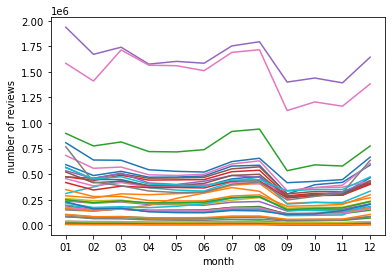

In [26]:
import matplotlib.pyplot as plt
plt.plot(month_review)
plt.xlabel('month')
plt.ylabel('number of reviews')
plt.show()

There are some seasonality in reviews. All product categories get similar patterns in number of reviews: relative stable from Jan-June, increase in June - July, decrease back to normal on Aug-Nov, and increase again in Dec. I do not see any product category have a significantly different seasonality based on the graph above. 

4) Which reviews are getting the most helpful votes / total votes?
4.1) Any correlation between the length of review headline / review body (in number words) and the "helpfulness" of the review?

In [54]:
length = udf(lambda x : len(x.split(" ")))
corr = review.select(['review_headline', 'review_body', 'helpful_votes']).\
filter(review.review_headline != "").\
filter(review.review_body != "").\
withColumn('hl_len', length(review.review_headline)).\
withColumn('bd_len', length(review.review_body))

In [55]:
corr.printSchema()

root
 |-- review_headline: string (nullable = true)
 |-- review_body: string (nullable = true)
 |-- helpful_votes: integer (nullable = true)
 |-- hl_len: string (nullable = true)
 |-- bd_len: string (nullable = true)



In [56]:
corr.show()

+--------------------+--------------------+-------------+------+------+
|     review_headline|         review_body|helpful_votes|hl_len|bd_len|
+--------------------+--------------------+-------------+------+------+
|Pleasantly surprised|I was very surpri...|            0|     2|    54|
|OnHub is a pretty...|I am a Google emp...|           24|    11|   880|
|None of them work...|Bought cables in ...|            2|     9|    52|
|just keep searching.|nope, cheap and slow|            0|     3|     4|
|          Five Stars|Excellent! Great ...|            0|     2|     7|
|Good quality, wor...|Good quality,work...|            0|     6|     6|
|in fact this is t...|This demn tablet ...|            1|     9|    26|
|                Good|I am not sure I d...|            1|     1|    62|
|You get what you ...|After exactly 45 ...|            0|     6|   118|
|Great for Windows...|Replaced my Intel...|            3|     5|   135|
|            One Star|IT HAS ALREADY CR...|            0|     2|

In [57]:
from pyspark.sql.types import IntegerType
corr = corr.withColumn("hl_len", corr["hl_len"].cast(IntegerType()))
corr = corr.withColumn("bd_len", corr["bd_len"].cast(IntegerType()))

In [58]:
corr.printSchema()

root
 |-- review_headline: string (nullable = true)
 |-- review_body: string (nullable = true)
 |-- helpful_votes: integer (nullable = true)
 |-- hl_len: integer (nullable = true)
 |-- bd_len: integer (nullable = true)



In [59]:
corr.stat.corr("helpful_votes","hl_len")

0.030987861229642637

In [60]:
corr.stat.corr("helpful_votes","bd_len")

0.1378718539767893

The correlation between helpful_votes and the length of review headlight is 0.031 and the correlation between helpful_votes and the legnth of review body is 0.138. Both of them are very low which means there is not much of a correlation between legnth of the review and the helpfulness of the review.

4.2) Do you see any correlation between how many reviews a certain customer (customer_id) published and the "helpfulness" of the reviews?

In [64]:
cust_count = review.select(['customer_id', 'helpful_votes']).\
groupby(["customer_id"]).\
agg(count("*").alias("n_review"), avg("helpful_votes").alias("avg_helpful_votes"))

In [66]:
cust_count.show()

+-----------+--------+-------------------+
|customer_id|n_review|  avg_helpful_votes|
+-----------+--------+-------------------+
|   14563706|      14|                1.0|
|   11586734|      70|                2.3|
|   50247916|       5|               13.8|
|   45648219|      47|  3.702127659574468|
|   30645635|       1|                0.0|
|   31970673|      75|               0.44|
|   42424153|       9| 1.3333333333333333|
|   22973422|      31|                2.0|
|   21018938|       1|                0.0|
|   11885606|       3|                0.0|
|   10596863|      11|0.45454545454545453|
|   46859141|      29| 0.7586206896551724|
|   40121046|      91| 0.5604395604395604|
|   28280106|      92|  2.641304347826087|
|   35755802|      93| 0.6881720430107527|
|   45753694|       1|                0.0|
|   37691695|       1|                0.0|
|   16420931|      36| 3.5555555555555554|
|   35414639|       1|                0.0|
|   13884881|      59| 1.5932203389830508|
+----------

In [67]:
cust_count.stat.corr("n_review","avg_helpful_votes")

-0.00018596383909285575

The correlation between number of review per customer_id and helpful_votes is -0.000186, which is negative and very small. There is not much correlation between them.